In [2]:
'''Importando librerias'''
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
print(tf.__version__)

2.0.0-rc0


In [4]:
'''Leemos el archivo que contiene la informacion de los generos de los Posters
de las peliculas'''
data = pd.read_csv('train.csv')
data.shape

(7254, 27)

In [5]:
'''Mostramos el formato del archivo csv'''
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
'''Cargamos las imagenes con su respectivo id del csv y las convertimos en arreglos'''
imgWidth = 350
imgHeight = 350
X = []
for i in tqdm(range(data.shape[0])):
    path = 'images/' + data['Id'][i] + '.jpg'
    img = image.load_img(path, target_size=(imgWidth, imgHeight, 3))
    img = image.img_to_array(img)
    img = img / 255.0
    X.append(img)
X = np.array(X)

100%|██████████| 7254/7254 [00:49<00:00, 147.11it/s]


In [7]:
'''Mostramos la forma de nuestro arreglo de imagenes'''
X.shape

(7254, 350, 350, 3)

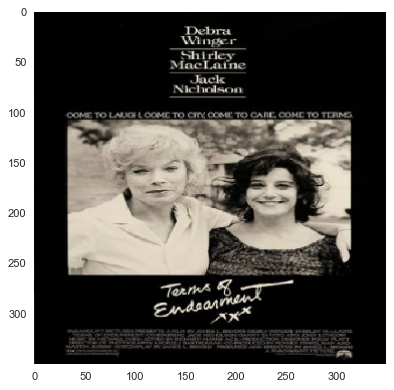

In [11]:
'''Mostramos una imagen para verificar que todo este funcionando correctamente'''
plt.style.use("seaborn")
plt.grid(False)
plt.imshow(X[0])

In [12]:
'''Vemos a que generos pertenece el poster de la pelicula'''
data['Genre'][0]

"['Comedy', 'Drama']"

In [14]:
'''Borramos columnas que no vamos a ocupar'''
y = data.drop(['Id', 'Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [15]:
'''Dividimos nuestro dataset para tener datos de testeo, en esta ocacion ocuparemos el 
15% de las imagenes como imagenes de testeo'''
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=0, test_size=0.15)

In [16]:
'''Mostramos la forma de nuestros datos de entrenamiento'''
XTrain[0].shape

(350, 350, 3)

## Creacion de modelo CNN

In [19]:
'''Creamos nuestro modelo de forma secuencial con la capa de entrada y 3 capas mas, las salidas 
seran 25 ya que son 25 tipos de generos de peliculas posibles'''
model = Sequential()
#Capa de entrada
model.add(Conv2D(16, (3, 3), activation='relu', input_shape= XTrain[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3)) #El porcentaje de neuronas que seran borradas de manera random
#Capa1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))
#Capa2       
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.4))
#Capa3        
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))          
          
model.add(Flatten()) #Convertimos los datos multidimensionales en un vector
          
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
model.add(Dense(25, activation='sigmoid')) #25 posibles salidas, ya que son 25 generos poibles

In [21]:
'''Podemos observar que tenemos 6,672,889 de parametros para nuestra red neuronal'''
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 86, 86, 32)       

In [22]:
'''Compilamos nuestro modelo'''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
'''Entrenamos el modelo pasandole nuestro set de entrenamiento, las epocas que queremos que 
ejecute y por ultimo nuestro set de testeo'''
history = model.fit(XTrain, yTrain, epochs=5, validation_data=(XTest, yTest))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


5888/6165 [===========================>..] - ETA: 18:10 - loss: 0.9898 - accuracy: 0.491 - ETA: 14:52 - loss: 1.0188 - accuracy: 0.499 - ETA: 13:42 - loss: 1.0129 - accuracy: 0.498 - ETA: 13:00 - loss: 1.0023 - accuracy: 0.497 - ETA: 12:33 - loss: 0.9988 - accuracy: 0.495 - ETA: 12:16 - loss: 0.9900 - accuracy: 0.498 - ETA: 12:10 - loss: 0.9904 - accuracy: 0.498 - ETA: 12:06 - loss: 0.9914 - accuracy: 0.496 - ETA: 11:59 - loss: 0.9896 - accuracy: 0.495 - ETA: 11:55 - loss: 0.9868 - accuracy: 0.495 - ETA: 11:48 - loss: 0.9852 - accuracy: 0.498 - ETA: 11:41 - loss: 0.9817 - accuracy: 0.500 - ETA: 11:32 - loss: 0.9799 - accuracy: 0.502 - ETA: 11:24 - loss: 0.9773 - accuracy: 0.503 - ETA: 11:17 - loss: 0.9750 - accuracy: 0.504 - ETA: 11:13 - loss: 0.9721 - accuracy: 0.504 - ETA: 11:09 - loss: 0.9664 - accuracy: 0.506 - ETA: 11:03 - loss: 0.9664 - accuracy: 0.507 - ETA: 10:57 - loss: 0.9634 - accuracy: 0.509 - ETA: 10:50 - loss: 0.9624 - accuracy: 0.509 - ETA: 10:49 - loss: 0.9631 - accurac

6165/6165 [==============================] - ETA: 28s - loss: 0.7035 - accuracy: 0.645 - ETA: 24s - loss: 0.7020 - accuracy: 0.646 - ETA: 21s - loss: 0.7007 - accuracy: 0.647 - ETA: 17s - loss: 0.6993 - accuracy: 0.648 - ETA: 13s - loss: 0.6981 - accuracy: 0.649 - ETA: 9s - loss: 0.6966 - accuracy: 0.650 - ETA: 6s - loss: 0.6951 - accuracy: 0.65 - ETA: 2s - loss: 0.6937 - accuracy: 0.65 - 737s 120ms/sample - loss: 0.6929 - accuracy: 0.6533 - val_loss: 0.5141 - val_accuracy: 0.7546
Epoch 2/5


5888/6165 [===========================>..] - ETA: 12:02 - loss: 0.4371 - accuracy: 0.832 - ETA: 12:06 - loss: 0.4350 - accuracy: 0.828 - ETA: 11:57 - loss: 0.4216 - accuracy: 0.842 - ETA: 11:43 - loss: 0.4177 - accuracy: 0.846 - ETA: 11:35 - loss: 0.4211 - accuracy: 0.845 - ETA: 11:28 - loss: 0.4261 - accuracy: 0.840 - ETA: 11:29 - loss: 0.4181 - accuracy: 0.846 - ETA: 11:31 - loss: 0.4181 - accuracy: 0.845 - ETA: 11:29 - loss: 0.4162 - accuracy: 0.846 - ETA: 11:22 - loss: 0.4137 - accuracy: 0.847 - ETA: 11:15 - loss: 0.4134 - accuracy: 0.848 - ETA: 11:10 - loss: 0.4130 - accuracy: 0.849 - ETA: 11:08 - loss: 0.4113 - accuracy: 0.850 - ETA: 11:06 - loss: 0.4101 - accuracy: 0.850 - ETA: 11:04 - loss: 0.4084 - accuracy: 0.851 - ETA: 10:59 - loss: 0.4072 - accuracy: 0.851 - ETA: 10:55 - loss: 0.4066 - accuracy: 0.852 - ETA: 10:50 - loss: 0.4065 - accuracy: 0.852 - ETA: 10:45 - loss: 0.4036 - accuracy: 0.854 - ETA: 10:42 - loss: 0.4017 - accuracy: 0.855 - ETA: 10:40 - loss: 0.4001 - accurac

6165/6165 [==============================] - ETA: 29s - loss: 0.3156 - accuracy: 0.890 - ETA: 25s - loss: 0.3154 - accuracy: 0.890 - ETA: 21s - loss: 0.3151 - accuracy: 0.890 - ETA: 17s - loss: 0.3149 - accuracy: 0.890 - ETA: 14s - loss: 0.3147 - accuracy: 0.890 - ETA: 10s - loss: 0.3144 - accuracy: 0.890 - ETA: 6s - loss: 0.3141 - accuracy: 0.890 - ETA: 2s - loss: 0.3137 - accuracy: 0.89 - 760s 123ms/sample - loss: 0.3135 - accuracy: 0.8909 - val_loss: 0.2468 - val_accuracy: 0.9072
Epoch 3/5


5888/6165 [===========================>..] - ETA: 13:09 - loss: 0.2667 - accuracy: 0.905 - ETA: 12:51 - loss: 0.2646 - accuracy: 0.900 - ETA: 12:39 - loss: 0.2722 - accuracy: 0.901 - ETA: 12:34 - loss: 0.2807 - accuracy: 0.899 - ETA: 12:32 - loss: 0.2709 - accuracy: 0.902 - ETA: 12:28 - loss: 0.2713 - accuracy: 0.904 - ETA: 12:24 - loss: 0.2714 - accuracy: 0.904 - ETA: 12:19 - loss: 0.2693 - accuracy: 0.905 - ETA: 12:16 - loss: 0.2683 - accuracy: 0.906 - ETA: 12:15 - loss: 0.2702 - accuracy: 0.905 - ETA: 12:08 - loss: 0.2693 - accuracy: 0.905 - ETA: 12:03 - loss: 0.2708 - accuracy: 0.904 - ETA: 11:59 - loss: 0.2704 - accuracy: 0.904 - ETA: 11:55 - loss: 0.2698 - accuracy: 0.904 - ETA: 11:50 - loss: 0.2710 - accuracy: 0.904 - ETA: 11:45 - loss: 0.2699 - accuracy: 0.905 - ETA: 11:41 - loss: 0.2699 - accuracy: 0.905 - ETA: 11:37 - loss: 0.2686 - accuracy: 0.905 - ETA: 11:32 - loss: 0.2690 - accuracy: 0.905 - ETA: 11:28 - loss: 0.2694 - accuracy: 0.904 - ETA: 11:25 - loss: 0.2695 - accurac

6165/6165 [==============================] - ETA: 29s - loss: 0.2638 - accuracy: 0.905 - ETA: 25s - loss: 0.2638 - accuracy: 0.905 - ETA: 21s - loss: 0.2637 - accuracy: 0.906 - ETA: 18s - loss: 0.2637 - accuracy: 0.905 - ETA: 14s - loss: 0.2638 - accuracy: 0.906 - ETA: 10s - loss: 0.2636 - accuracy: 0.906 - ETA: 6s - loss: 0.2635 - accuracy: 0.906 - ETA: 2s - loss: 0.2634 - accuracy: 0.90 - 765s 124ms/sample - loss: 0.2632 - accuracy: 0.9063 - val_loss: 0.2463 - val_accuracy: 0.9075
Epoch 4/5


5888/6165 [===========================>..] - ETA: 12:36 - loss: 0.2881 - accuracy: 0.882 - ETA: 12:35 - loss: 0.2724 - accuracy: 0.889 - ETA: 12:27 - loss: 0.2671 - accuracy: 0.897 - ETA: 12:10 - loss: 0.2651 - accuracy: 0.896 - ETA: 11:57 - loss: 0.2590 - accuracy: 0.902 - ETA: 11:50 - loss: 0.2583 - accuracy: 0.901 - ETA: 11:50 - loss: 0.2589 - accuracy: 0.901 - ETA: 11:49 - loss: 0.2552 - accuracy: 0.904 - ETA: 11:48 - loss: 0.2550 - accuracy: 0.904 - ETA: 11:42 - loss: 0.2520 - accuracy: 0.905 - ETA: 11:36 - loss: 0.2494 - accuracy: 0.906 - ETA: 11:30 - loss: 0.2499 - accuracy: 0.907 - ETA: 11:25 - loss: 0.2490 - accuracy: 0.908 - ETA: 11:23 - loss: 0.2498 - accuracy: 0.908 - ETA: 11:22 - loss: 0.2506 - accuracy: 0.907 - ETA: 11:16 - loss: 0.2506 - accuracy: 0.907 - ETA: 11:10 - loss: 0.2506 - accuracy: 0.908 - ETA: 11:05 - loss: 0.2494 - accuracy: 0.909 - ETA: 11:01 - loss: 0.2511 - accuracy: 0.908 - ETA: 10:58 - loss: 0.2527 - accuracy: 0.908 - ETA: 10:55 - loss: 0.2525 - accurac

6165/6165 [==============================] - ETA: 29s - loss: 0.2532 - accuracy: 0.909 - ETA: 25s - loss: 0.2531 - accuracy: 0.909 - ETA: 21s - loss: 0.2532 - accuracy: 0.909 - ETA: 17s - loss: 0.2533 - accuracy: 0.909 - ETA: 14s - loss: 0.2532 - accuracy: 0.909 - ETA: 10s - loss: 0.2531 - accuracy: 0.909 - ETA: 6s - loss: 0.2531 - accuracy: 0.909 - ETA: 2s - loss: 0.2530 - accuracy: 0.90 - 759s 123ms/sample - loss: 0.2532 - accuracy: 0.9097 - val_loss: 0.2409 - val_accuracy: 0.9089
Epoch 5/5


5888/6165 [===========================>..] - ETA: 12:02 - loss: 0.2162 - accuracy: 0.917 - ETA: 12:16 - loss: 0.2426 - accuracy: 0.908 - ETA: 12:23 - loss: 0.2536 - accuracy: 0.907 - ETA: 12:19 - loss: 0.2476 - accuracy: 0.907 - ETA: 12:07 - loss: 0.2481 - accuracy: 0.908 - ETA: 11:59 - loss: 0.2440 - accuracy: 0.910 - ETA: 11:51 - loss: 0.2437 - accuracy: 0.910 - ETA: 11:49 - loss: 0.2428 - accuracy: 0.910 - ETA: 11:49 - loss: 0.2468 - accuracy: 0.909 - ETA: 11:47 - loss: 0.2479 - accuracy: 0.908 - ETA: 11:39 - loss: 0.2476 - accuracy: 0.909 - ETA: 11:34 - loss: 0.2514 - accuracy: 0.909 - ETA: 11:29 - loss: 0.2526 - accuracy: 0.909 - ETA: 11:26 - loss: 0.2530 - accuracy: 0.909 - ETA: 11:23 - loss: 0.2510 - accuracy: 0.910 - ETA: 11:20 - loss: 0.2503 - accuracy: 0.909 - ETA: 11:16 - loss: 0.2513 - accuracy: 0.909 - ETA: 11:11 - loss: 0.2517 - accuracy: 0.909 - ETA: 11:06 - loss: 0.2513 - accuracy: 0.909 - ETA: 11:02 - loss: 0.2503 - accuracy: 0.910 - ETA: 11:00 - loss: 0.2509 - accurac

6165/6165 [==============================] - ETA: 29s - loss: 0.2479 - accuracy: 0.910 - ETA: 25s - loss: 0.2478 - accuracy: 0.910 - ETA: 21s - loss: 0.2478 - accuracy: 0.910 - ETA: 17s - loss: 0.2476 - accuracy: 0.910 - ETA: 13s - loss: 0.2476 - accuracy: 0.910 - ETA: 10s - loss: 0.2476 - accuracy: 0.910 - ETA: 6s - loss: 0.2474 - accuracy: 0.910 - ETA: 2s - loss: 0.2474 - accuracy: 0.91 - 755s 123ms/sample - loss: 0.2474 - accuracy: 0.9109 - val_loss: 0.2399 - val_accuracy: 0.9087


In [27]:
'''Ploteamos la curva de aprendizaje y la curva de perdida'''
def plotLearningCurve(history, epoch):
    #Ploteo de valores de exactitud
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Exactitud del modelo')
    plt.ylabel('Exactitud')
    plt.xlabel('Epoca')
    plt.legend(['Entrenamiento', 'Valor'], loc='upper left')
    plt.show()

    #Ploteo de valores perdidos
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Perdida del modelo')
    plt.ylabel('Perdida')
    plt.xlabel('Epoca')
    plt.legend(['Entrenamiento', 'Valor'], loc='upper left')
    plt.show()

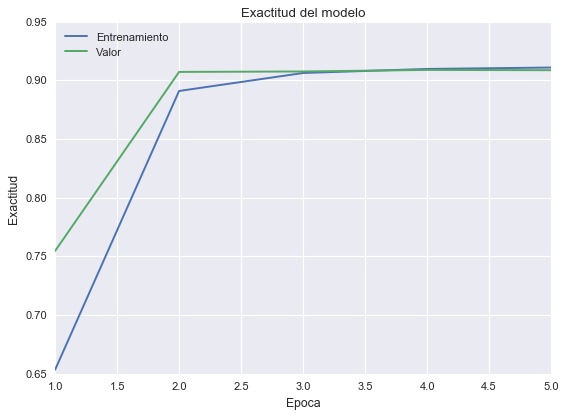

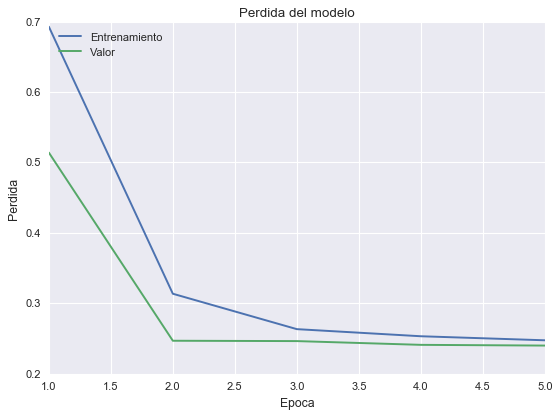

In [28]:
plotLearningCurve(history, 5)

## Probando el modelo

In [41]:
def testingModel(testingImage):
    img = testingImage
    plt.imshow(img)
    plt.grid(False)
    img = image.img_to_array(img)
    img = img / 255.0
    img = img.reshape(1, imgWidth, imgHeight, 3)
    '''Tomar valores despues de la segunda columna, ya que en data tenemos todo el csv
    Calcular la probabilidad de cada genero para esta imagen
    Elegir el top 3 con mas probabilidad'''
    classes = data.columns[2:] 
    yProbability = model.predict(img)
    top3Prediction = np.argsort(yProbability[0])[:-4:-1]
    top3Prediction
    for i in range(3):
        print(classes[top3Prediction[i]])
        
def modelAccuracyByClass():
    index = np.arange(len(classes))
    plt.bar(index, yProbability[0])
    plt.ylabel('Confiabilidad', fontsize=15)
    plt.xticks(index, classes, fontsize=15, rotation=90)
    plt.title('Predicciones')
    plt.show()

Drama
Comedy
Action


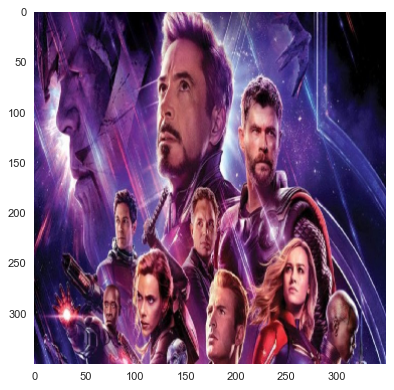

In [42]:
testingImage = image.load_img('endgame.jpg', target_size=(imgWidth, imgHeight, 3))
testingModel(testingImage)

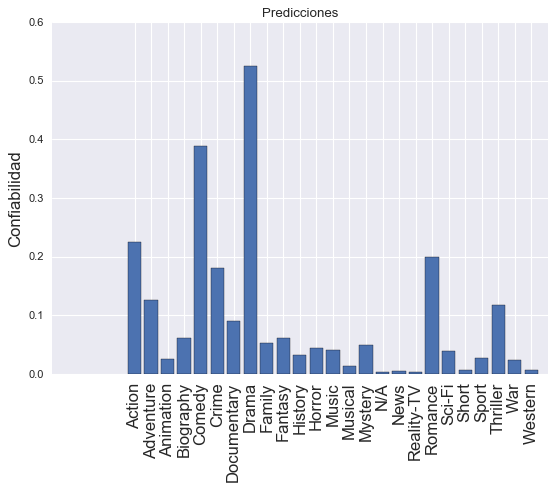

In [43]:
modelAccuracyByClass()